In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Assignment 1.1

In [2]:
exp1a = pd.read_csv('exp1a.csv')
exp1a.name = 'exp1a'
exp1b = pd.read_csv('exp1b.csv')
exp1b.name = 'exp1b'
exp1c = pd.read_csv('exp1c.csv')
exp1c.name = 'exp1c'

## (a)
Visualize the data sets from Experiment 1

<AxesSubplot:xlabel='x', ylabel='y'>

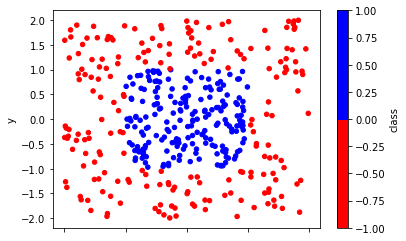

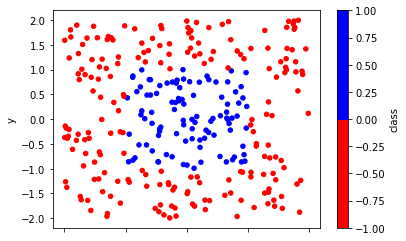

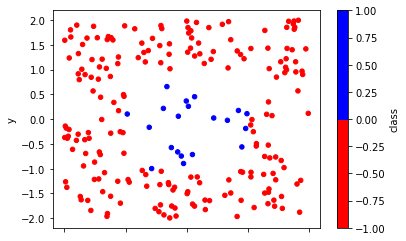

In [3]:
cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
exp1a.plot.scatter('x','y', c='class', cmap=cmap)
exp1b.plot.scatter('x','y', c='class', cmap=cmap)
exp1c.plot.scatter('x','y', c='class', cmap=cmap)


## (b) and (c)
For each fo the data sets, how does the 10-fold cross-validation accuracy rates and confusion matrices vary as k increases? Explain this trend.

In [4]:
idx = [
    np.array([1, 1, 5, 5, 11, 11, 21, 21]),
    np.array(['positive', 'negative'] * 4)
    ]

cols = [
    np.concatenate([[i] * 3 for i in ['exp1a', 'exp1b', 'exp1c']]),
    ['confusion matrix', 'confusion matrix', 'accuracy'] * 3,
    ['positive', 'negative', ''] * 3
    ]
results_b_c = pd.DataFrame(columns=cols, index=idx)

results_b_c.index.names = ['k', 'predicted']
for exp in [exp1a, exp1b, exp1c]:
    for k in [1,5,11,21]:
        knn = KNeighborsClassifier(n_neighbors=k)
        y_predict = cross_val_predict(knn, exp[['x', 'y']], exp['class'], cv=10)
        results_b_c.loc[k,(exp.name, 'confusion matrix')] = confusion_matrix(exp['class'], y_predict)
        results_b_c.loc[k,(exp.name, 'accuracy')] = accuracy_score(exp['class'], y_predict)
results_b_c

exp1a                              exp1b           \
             confusion matrix          accuracy confusion matrix            
                     positive negative                  positive negative   
k  predicted                                                                
1  positive               194        6   0.9775              193        7   
   negative                 3      197   0.9775                5       95   
5  positive               183       17   0.9525              194        6   
   negative                 2      198   0.9525                4       96   
11 positive               177       23   0.9425              190       10   
   negative                 0      200   0.9425                6       94   
21 positive               171       29   0.9275              190       10   
   negative                 0      200   0.9275                8       92   

                                  exp1c                     
              accuracy confusion matrix           accuracy  
                               positive negative            
k  predicted                                                
1  positive       0.96              194        6  0.940909  
   negative       0.96                7       13  0.940909  
5  positive   0.966667              200        0  0.977273  
   negative   0.966667                5       15  0.977273  
11 positive   0.946667              200        0  0.945455  
   negative   0.946667               12        8  0.945455  
21 positive       0.94              200        0  0.936364  
   negative       0.94               14        6  0.936364

<AxesSubplot:title={'center':'accuracy by k'}, xlabel='k'>

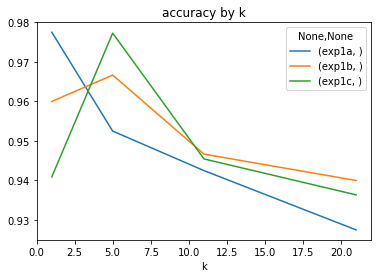

In [5]:
(results_b_c
    .select_dtypes(object)
    .astype(float)
    .xs('accuracy', axis=1, level=1)
    .groupby('k', level=0, axis=0)
    .agg('mean')
).plot.line(title='accuracy by k')

<AxesSubplot:title={'center':'accuracy by dataset'}>

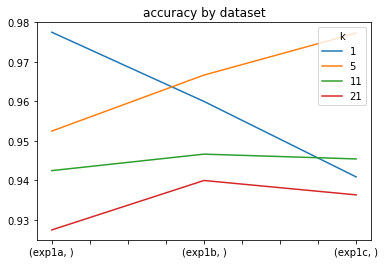

In [6]:
(results_b_c
    .select_dtypes(object)
    .astype(float)
    .xs('accuracy', axis=1, level=1)
    .groupby('k', level=0, axis=0)
    .agg('mean')
).T.plot.line(title='accuracy by dataset')

As we can see with increasing k the accuracy drops for all data sets. However, it's important to notice, that for set exp1b and exp1c there is a spike for k=5. This can be explained by the fact that with increasing k we decrease the flexibility of the model and hence increase the bias (while decreasing the variance). According to the recorded accuracy values it can be assumed that the best tradeoff between bias and variance is at about k=5. It's also interesting to see, that the different data sets yield different results for different k values. From the chart 'accuracy by dataset' we can clearly see, the different k-values yield different results for different data sets. Whereas k=11 performs only third best for exp1a and exp1b it performs second best for exp1c.

## (d)

In [7]:
idx = [
    np.array([1, 1, 5, 5, 11, 11, 21, 21]),
    np.array(['positive', 'negative'] * 4)
    ]

cols = [
    np.concatenate([[i] * 3 for i in ['exp1a', 'exp1b', 'exp1c']]),
    ['confusion matrix', 'confusion matrix', 'accuracy'] * 3,
    ['positive', 'negative', ''] * 3 
    ]
results_d = pd.DataFrame(columns=cols, index=idx)
results_d.index.names = ['k', 'predicted']
for exp in [exp1a, exp1b, exp1c]:
    for k in [1,5,11,21]:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        y_predict = cross_val_predict(knn, exp[['x', 'y']], exp['class'], cv=10)
        results_d.loc[k,(exp.name, 'confusion matrix')] = confusion_matrix(exp['class'], y_predict)
        results_d.loc[k,(exp.name, 'accuracy')] = accuracy_score(exp['class'], y_predict)
results_d

exp1a                              exp1b           \
             confusion matrix          accuracy confusion matrix            
                     positive negative                  positive negative   
k  predicted                                                                
1  positive               194        6   0.9775              193        7   
   negative                 3      197   0.9775                5       95   
5  positive               189       11   0.9675              195        5   
   negative                 2      198   0.9675                4       96   
11 positive               186       14   0.9625              194        6   
   negative                 1      199   0.9625                6       94   
21 positive               179       21   0.9475              193        7   
   negative                 0      200   0.9475                4       96   

                                  exp1c                     
              accuracy confusion matrix           accuracy  
                               positive negative            
k  predicted                                                
1  positive       0.96              194        6  0.940909  
   negative       0.96                7       13  0.940909  
5  positive       0.97              200        0  0.977273  
   negative       0.97                5       15  0.977273  
11 positive       0.96              200        0  0.968182  
   negative       0.96                7       13  0.968182  
21 positive   0.963333              200        0  0.968182  
   negative   0.963333                7       13  0.968182

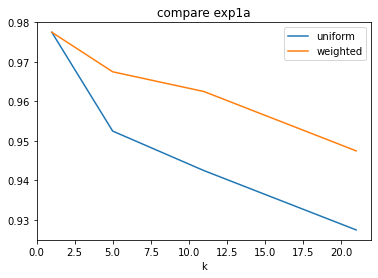

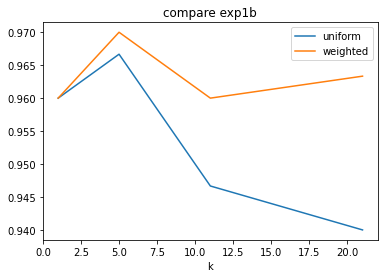

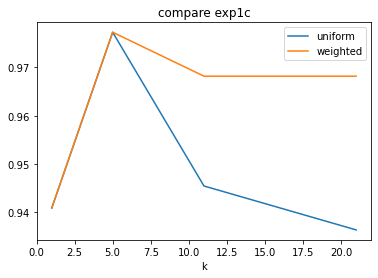

In [8]:
compare_results = pd.concat(
    (results_b_c.select_dtypes(object).astype(float).xs('accuracy', axis=1, level=1).groupby('k', level=0, axis=0).agg('mean'), 
    results_d.select_dtypes(object).astype(float).xs('accuracy', axis=1, level=1).groupby('k', level=0, axis=0).agg('mean')
    )
    , axis=1
)
compare_results.columns = ['exp1a', 'exp1b', 'exp1c', 'exp1a_d', 'exp1b_d', 'exp1c_d']

for i in ['a', 'b', 'c']:
    temp = compare_results[[f'exp1{i}', f'exp1{i}_d']]
    temp.columns = ['uniform', 'weighted']
    temp.plot.line(title=f'compare exp1{i}')

In the plot 'compare results from b and d' we can see that the classifier using the weighted kNN approach perform better (or equal for exp1c) for all values of k. For the 'uniform' approach (where all neighbors are weighted equally) we see a bad generalization performance for increasing k. The 'weighted' approach on the other hand performs better for greater k. It is assumed, that this is because close neighbors are better indicators for the class than neighbors with a greater distance. Additionally we have to consider that these data sets are noise free. So for this example it can be concluded, that weighted distances generalize better.

## (e)
run decision trees and logistic regression on the data sets

In [9]:
cols = [
    ['exp1a', 'exp1a', 'exp1a' ,'exp1b', 'exp1b', 'exp1b', 'exp1c', 'exp1c', 'exp1c'],
    ['confusion matrix', 'confusion matrix', 'accuracy'] * 3,
    ['positive', 'negative', ''] * 3
    ]

idx = [
    np.concatenate([([i]*2) for i in ['Decision Trees', 'Logistic Regression']], axis=0),
    # np.array(['decision tree', 'decision tree', 'logistic regression', 'logistic regression']),
    np.array(['positive', 'negative'] * 2)
    ]

results_e = pd.DataFrame(columns=cols, index = idx)

results_e.index.names = ['classifier', 'predicted']
for exp in [exp1a, exp1b, exp1c]:
    des_tree = DecisionTreeClassifier(criterion='entropy')
    log_reg = LogisticRegression()
    y_predict_tree = cross_val_predict(des_tree, exp[['x','y']], exp['class'])
    y_predict_log_reg = cross_val_predict(log_reg, exp[['x','y']], exp['class'])
    results_e.loc['Decision Trees',(exp.name, 'confusion matrix')] = confusion_matrix(exp['class'], y_predict_tree)
    results_e.loc['Logistic Regression',(exp.name, 'confusion matrix')] = confusion_matrix(exp['class'], y_predict_log_reg)
    results_e.loc['Decision Trees',(exp.name, 'accuracy')] = accuracy_score(exp['class'], y_predict_tree)
    results_e.loc['Logistic Regression',(exp.name, 'accuracy')] = accuracy_score(exp['class'], y_predict_log_reg)
results_e

exp1a                    \
                              confusion matrix          accuracy   
                                      positive negative            
classifier          predicted                                      
Decision Trees      positive               200        0    0.995   
                    negative                 2      198    0.995   
Logistic Regression positive               104       96   0.5275   
                    negative                93      107   0.5275   

                                         exp1b                     \
                              confusion matrix           accuracy   
                                      positive negative             
classifier          predicted                                       
Decision Trees      positive               200        0  0.986667   
                    negative                 4       96  0.986667   
Logistic Regression positive               200        0  0.666667   
                    negative               100        0  0.666667   

                                         exp1c                     
                              confusion matrix           accuracy  
                                      positive negative            
classifier          predicted                                      
Decision Trees      positive               200        0  0.977273  
                    negative                 5       15  0.977273  
Logistic Regression positive               200        0  0.909091  
                    negative                20        0  0.909091

<AxesSubplot:title={'center':'accuracy by dataset'}>

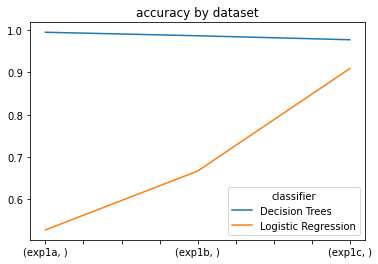

In [10]:
(results_e
    .select_dtypes(object)
    .astype(float)
    .xs('accuracy', axis=1, level=1)
    .groupby('classifier', level=0, axis=0)
    .agg('mean')
).T.plot.line(title='accuracy by dataset')

The data in experiment 1 does not follow a linear distribution. Hence, the logistic regression yields worse results than the decision trees. Decision trees work very well on this type of data, since the decision boundaries are parallel to the axis of the coordinate system. When looking at the chart 'accuracy by dataset' we can see, that for the exp1c we get way better results than for exp1a and exp1b. This is probably because the exp1c is the most imbalanced one. Whereas exp1a is split in equal proportions. Hence, we recieve for exp1a an accuracy score below 0.6. This underscores the impact an unbalanced dataset can have on the classification accuracy score.

# Assignment 1.2
to improve the performance of SVC/logistic regression and get fitting and prediction results in a reasonable amount of time I implemented the standard scaler. This is especially important for the exp2b data set.

In [11]:
exp2a = pd.read_csv('exp2a.csv')
exp2a.name = 'exp2a'
exp2b = pd.read_csv('exp2b.csv')
exp2b.name = 'exp2b'

In [12]:
des_tree = DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier()
gau_nav_bay = GaussianNB()
log_reg = LogisticRegression()
svm_clf = SVC(kernel='linear')

## (a)
which classifiers have a good, which have a bad gernalization performance?

In [13]:
def get_evaluation(data_set, classifier_):
    classifier_names = [str(j.__class__).split('.')[-1][:-2] for j in classifier_]
    cols = [
        np.concatenate([([i.name]*3) for i in [data_set]], axis=0),
        ['confusion matrix', 'confusion matrix', 'accuracy']*1,
        [1, 2, '']*1
        ]
    idx = [
        np.concatenate([([i]*2) for i in classifier_names], axis=0),
        [1, 2] * len(classifier_names)
    ]
    results = pd.DataFrame(columns=cols, index = idx)
    results.index.names = ['classifier', 'prediction']

    X = data_set.iloc[:,:-1]
    y = data_set.iloc[:,-1]


    for clf in classifier_:
            clf_name = str(clf.__class__).split('.')[-1][:-2]
            y_predict = cross_val_predict(clf, X, y)
            cm = confusion_matrix(y, y_predict)
            acc = accuracy_score(y, y_predict)
            results.loc[clf_name,(data_set.name, 'confusion matrix')] = cm
            results.loc[clf_name,(data_set.name, 'accuracy')] = acc

    return results

get_evaluation(exp2a, [des_tree, knn, gau_nav_bay, log_reg, svm_clf])

exp2a               
                                  confusion matrix       accuracy
                                                 1    2          
classifier             prediction                                
DecisionTreeClassifier 1                       550    0       1.0
                       2                         0  551       1.0
KNeighborsClassifier   1                       550    0       1.0
                       2                         0  551       1.0
GaussianNB             1                         0  550   0.02634
                       2                       522   29   0.02634
LogisticRegression     1                         0  550   0.02634
                       2                       522   29   0.02634
SVC                    1                       220  330  0.499546
                       2                       221  330  0.499546

In [14]:
#TODO: why is that the case?


## (b)
Gausian Gausian Naive Bayes, Logistic Regression and SVC show an accuracy that could be improved. I'll use GridSearchCV to search for better hyper-parameter.

### Gausian Naive Bayes

In [15]:
X = exp2a.iloc[:,:-1]
y = exp2a.iloc[:,-1]

list_improved_clf = []
gs_gnb = GridSearchCV(gau_nav_bay, {'var_smoothing': np.logspace(300,0, num=200)}, cv=10, n_jobs=-1)
gs_gnb.fit(X, y)
improved_clfs = [gs_gnb]
gs_gnb.best_params_

{'var_smoothing': 1e+300}

### Logistic Regression

In [16]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = np.logspace(-5,5, num=200)
model = LogisticRegression()

# disable warnings to increase readability. Some combinations of penalty asd C values produce errors.
warnings.simplefilter(action='ignore', category=UserWarning)

gs_lr = RandomizedSearchCV(model, space, cv=10, n_jobs=-1, n_iter=500, scoring='accuracy')
gs_lr.fit(X,y)
improved_clfs.append(gs_lr)

warnings.simplefilter(action='default', category=UserWarning)
gs_lr.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.00325508859983506}

### SVC

In [17]:
space = dict()
space['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
gs_svm = GridSearchCV(svm_clf, param_grid=space, cv=10, scoring='accuracy', n_jobs=-1)
gs_svm.fit(X_transform,y)
improved_clfs.append(gs_svm)
gs_svm.best_params_

{'kernel': 'poly'}

### Accuracy comparison

In [18]:
old_acc = (
    get_evaluation(exp2a, [des_tree, knn, gau_nav_bay, log_reg, svm_clf])
        .select_dtypes(object)
        .astype(float)
        .xs('accuracy', 1, 1)
        .groupby('classifier', 0)
        .agg('mean')
    )

new_acc = (
    get_evaluation(exp2a, [i.best_estimator_ for i in improved_clfs])
        .select_dtypes(object)
        .astype(float)
        .xs('accuracy', 1, 1)
        .groupby('classifier', 0)
        .agg('mean')
    ).merge(old_acc, left_index=True, right_index=True)

new_acc.columns = ['new acc', 'old acc']

new_acc.assign(difference = lambda x: x['new acc'] - x['old acc'])

,new acc,old acc,difference
classifier,,,
GaussianNB,0.499546,0.026340,0.473206
LogisticRegression,0.499546,0.026340,0.473206
SVC,1.000000,0.499546,0.500454


it can be seen that the change of the hyperparameters has a tremendous effect on the accuracy of the classifiers.

## (c) and (d)

In [19]:
cols = [
    np.concatenate([([i]*3) for i in ['exp2a', 'exp2b']], axis=0),
    ['confusion matrix', 'confusion matrix', 'accuracy']*2,
    ['positive', 'negative', '']*2
    ]
idx = [
    np.concatenate([([str(i.__class__).split('.')[-1][:-2]]*2) for i in [des_tree, knn, gau_nav_bay, log_reg, svm_clf]], axis=0),
    ['positive', 'negative'] * 5
]
results_2_c_d = pd.DataFrame(columns=cols, index = idx)
results_2_c_d.index.names = ['classifier', 'prediction']


for exp in [exp2a, exp2b]:
    X = exp.iloc[:, :-1].values
    y = exp.iloc[:,-1].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    for clf in [des_tree, knn, gau_nav_bay, log_reg, svm_clf]:
        name = str(clf.__class__).split('.')[-1][:-2]
        y_predict = cross_val_predict(clf, X, y)
        cm = confusion_matrix(y, y_predict)
        acc = accuracy_score(y, y_predict)
        results_2_c_d.loc[name,(exp.name, 'confusion matrix')] = cm
        results_2_c_d.loc[name,(exp.name, 'accuracy')] = acc
results_2_c_d

exp2a                     \
                                  confusion matrix           accuracy   
                                          positive negative             
classifier             prediction                                       
DecisionTreeClassifier positive                550        0       1.0   
                       negative                  0      551       1.0   
KNeighborsClassifier   positive                550        0       1.0   
                       negative                  0      551       1.0   
GaussianNB             positive                  0      550   0.02634   
                       negative                522       29   0.02634   
LogisticRegression     positive                  0      550   0.02634   
                       negative                522       29   0.02634   
SVC                    positive                220      330  0.499546   
                       negative                221      330  0.499546   

                                             exp2b                     
                                  confusion matrix           accuracy  
                                          positive negative            
classifier             prediction                                      
DecisionTreeClassifier positive                499       51  0.913715  
                       negative                 44      507  0.913715  
KNeighborsClassifier   positive                361      189  0.608538  
                       negative                242      309  0.608538  
GaussianNB             positive                132      418   0.26158  
                       negative                395      156   0.26158  
LogisticRegression     positive                175      375  0.331517  
                       negative                361      190  0.331517  
SVC                    positive                269      281  0.499546  
                       negative                270      281  0.499546

,exp2a,exp2b,difference
,,,
classifier,,,
DecisionTreeClassifier,1.000000,0.913715,-0.086285
GaussianNB,0.026340,0.261580,0.235241
KNeighborsClassifier,1.000000,0.608538,-0.391462
LogisticRegression,0.026340,0.331517,0.305177
SVC,0.499546,0.499546,0.000000


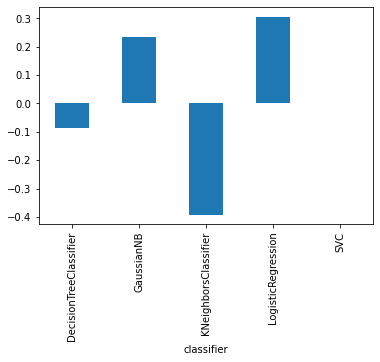

In [20]:
accuracy_comp = (
    results_2_c_d
        .select_dtypes(object)
        .astype(float)
        .xs('accuracy', axis=1, level=1)
        .groupby('classifier', level=0, axis=0)
        .agg('mean')
        .assign(difference = lambda x: x['exp2b'] - x['exp2a'])
    )
accuracy_comp['difference'].plot.bar()
accuracy_comp

Given the fact that the dataset was enriched by adding noisy features, sampled from a totally unreleated distribution it's suprising to see that in fact some classifiers worked even better than expected.

- Decision Trees 
    - decrease can most likely be explained by noisy variables making it harder to generate linear decision boundaries parallel to axes. On the other hand that decrease is suprising, as the decision tree employs embedded feature selection, which should root out (at least part of) the noisy variables added to the set.
- Gausian Naive Bayes
     - In 1.2(b) it was shown, that the performance of the Naive Bayes Classifier is influenced by the parameter 'var_smoothing'. Given the increased number of features and the non-linearity of the resulting data set it's supprising, that the NaiveBayes Classifier reaches a better result for exp2b, than for exp2a
- Logistic Regression
     - In 1.2(b) it was shown, that the Logistic Regression can be heavily optimized using many different parameters. The implementation as shown in Table 1 is simply not optimal. However, the increase in performance is still suprising, given that the added noisy features dont contribute to the linearity of the data-set it's suprising that the logistic regression yields better results for exp2b than for exp2a.
- Nearest Neighbor
     - the increased number of features invokes the 'cures of dimensionality'. This means that the density of features is decreased, which leads to worse generalization performance.
- Support Vector Machines
     - 1.2(b) has shown that SVM is highly dependent on the kernel function. As this has not changed it's n supprising, that the results are also unchangeotd.

# 1.3

In [21]:
exp3a = pd.read_csv('exp3a.csv')
exp3a.name = 'exp3a'
exp3b = pd.read_csv('exp3b.csv')
exp3b.name = 'exp3b'
exp3c = pd.read_csv('exp3c.csv')
exp3c.name = 'exp3c'
exp3d = pd.read_csv('exp3d.csv')
exp3d.name = 'exp3d'

In [22]:
des_tree = DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier()
gau_nav_bay = GaussianNB()
log_reg = LogisticRegression()
svm_clf = SVC(kernel='linear')

## (a)

,exp3a,exp3b,exp3c,exp3d
Gausian Naive Bayes,0.959,0.959,0.922,0.89
KNN_k=1,0.988,0.808,0.73,0.634
KNN_k=5,0.983,0.855,0.799,0.715
Decision Tree,0.964,0.749,0.634,0.566


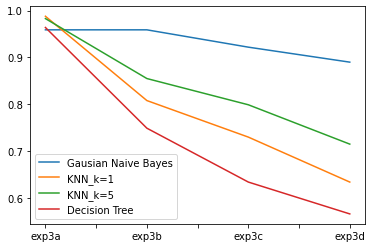

In [23]:
idx = ['Gausian Naive Bayes', 'KNN_k=1', 'KNN_k=5', 'Decision Tree']
cols = ['exp3a', 'exp3b', 'exp3c', 'exp3d']
results_1_3_a = pd.DataFrame(index=idx, columns=cols)
for name, clf in zip(['Gausian Naive Bayes', 'KNN_k=1', 'KNN_k=5', 'Decision Tree'], [GaussianNB(), KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(criterion='entropy')]):
    for exp in [exp3a, exp3b, exp3c, exp3d]:
        X = exp.iloc[:,:-1]
        y = exp.iloc[:,-1]
        y_predict = cross_val_predict(clf, X, y, cv=10, n_jobs=-1)
        acc = accuracy_score(y, y_predict)
        results_1_3_a.loc[name, exp.name] = acc
results_1_3_a.T.plot.line()
results_1_3_a

We can see that all classifiers have the highest accuracy for exp3a and the lowest for exp3d. 

## (b)

,# features: 2,# features: 10,# features: 20,# features: 50
Gausian Naive Bayes,0.959,0.959,0.922,0.89
KNN_k=1,0.988,0.808,0.73,0.634
KNN_k=5,0.983,0.855,0.799,0.715
Decision Tree,0.964,0.749,0.634,0.566


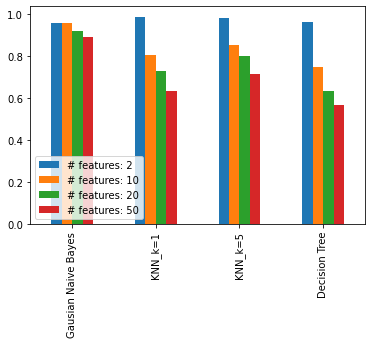

In [24]:
results_1_3_a.plot.bar()
plt.legend(labels = [f'# features: {exp.iloc[:,:-1].shape[1]}' for exp in [exp3a, exp3b, exp3c, exp3d]], loc=3)
results_1_3_a.columns = [f'# features: {exp.iloc[:,:-1].shape[1]}' for exp in [exp3a, exp3b, exp3c, exp3d]]
results_1_3_a

To evaluate this correclty we have to take into account that the number of features increases from exp3a to exp3d. As we can clearly see the increase of features leads to an decrease in accuracy. This effect is of different strength for different classifiers. The best performing classifier is Gausian Naive Bayes, which only decreases from 0.959 for 2 features to 0.89 for 50 features. k-NearestNeighbors on the other hand perform worse for increasing numbers of features. This can be very well explained with the curse of dimensionality. This describes the fact that data is less dense the more dimensions are taken into account. It's noteworthy however, that a smaller k (k=1) performs better for low dimensions than a higher k (k=5). For higher dimensions however this effect is reversed. So KNN_k=1 declines from 0.988 to 0.634, whereas the KNN_k=5 starts lower at 0.983, but ends higher at 0.715.
The decision tree sees the highest drop in accuracy (from 0.966 to 0.554). This can be explained with the fact, that the data is distributed in a way, that's very hard to capture for a decision tree. For higher dimensions this effect increases, meaning that the individual decision trees are heavily overfitted, so they don't generalize very well.